In [1]:
#!/usr/bin/env python
import os
import sys
if os.path.exists('/home/chieh/code/wPlotLib'):
	sys.path.insert(0,'/home/chieh/code/wPlotLib')
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [2]:
import wuml
import numpy as np
import torch
import wplotlib

Splits the data into training and test

In [3]:
data = wuml.wData(xpath='../../data/regress.csv', ypath='../../data/regress_label.csv', batch_size=20, label_type='continuous')
wuml.split_training_test(data, data_name='regress', data_path='../../data/', xdata_type="%.4f", ydata_type="%.4f", test_percentage=0.2)

[   0
 0  3
 1  1
 2  4
 3  2
 4  3
 5  3
 6  4,
    0
 0  4
 1  2,
 array([3. , 1.1, 4. , 2.2, 2. , 1. , 2. ], dtype=float32),
 array([3. , 1.1], dtype=float32)]

In [4]:
def costFunction(x, y, ŷ, ind):
	ŷ = torch.squeeze(ŷ)
	return torch.sum((y- ŷ) ** 2)	

In [5]:
data_train = wuml.wData(xpath='../../data/regress_train.csv', ypath='../../data/regress_train_label.csv', batch_size=20, label_type='continuous')
data_test = wuml.wData(xpath='../../data/regress_test.csv', ypath='../../data/regress_test_label.csv', batch_size=20, label_type='continuous')

In [6]:
bNet = wuml.basicNetwork(costFunction, data_train, networkStructure=[(100,'relu'),(100,'relu'),(1,'none')], max_epoch=500, learning_rate=0.001)
bNet.train()

	epoch: 500, Avg Loss: 4.2785, Learning Rate: 0.00100000

In [7]:
Ŷ_train = bNet(data_train, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor
Ŷ_test = bNet(data_test, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

In [8]:
newX = np.expand_dims(np.arange(0,5,0.1),1)
Ŷ_line = bNet(newX, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

plot the results out<br>
If show is false, the next plot will superimpose on the current one

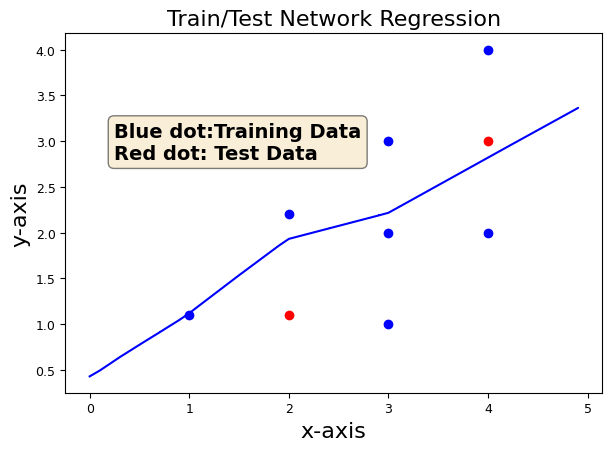

In [9]:
wplotlib.scatter(data_train.X, data_train.Y, marker='o', color='blue', show=False)	
wplotlib.scatter(data_test.X, data_test.Y, marker='o', color='red', show=False)
wplotlib.lines(newX, Ŷ_line, title='Train/Test Network Regression', xlabel='x-axis', ylabel='y-axis', 
				imgText='Blue dot:Training Data\nRed dot: Test Data')